# Mexico vs Poland 2022 World Cup Analysis

On this notebook we will be analyzing Mexico's performance againts Poland in the first game of the group stage at the 2022 FIFA World Cup

This is analysis was made by [@MauricioSoria](https://www.linkedin.com/in/mauricio-soria1/)

With special help of [@MPLSoccer](https://mplsoccer.readthedocs.io/en/latest/index.html) with the code, and [@StatsBomb](https://statsbomb.com/es/noticias/datos-gratuitos-la-copa-mundial-2022-con-statsbomb-360/l) who shared the open data

In [1]:
from statsbombpy import sb

In [2]:
import math
from urllib.request import urlopen
import warnings
import matplotlib as mpl
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

import cmasher as cmr
import numpy as np
from highlight_text import ax_text



from mplsoccer import VerticalPitch, Sbopen, FontManager, inset_image, Pitch, add_image

# data parser, fonts and path effects for giving the font an edge
parser = Sbopen()
roboto_bold = FontManager(
    'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf')
path_eff = [path_effects.Stroke(linewidth=3, foreground='white'),
            path_effects.Normal()]

# First Half Analysis

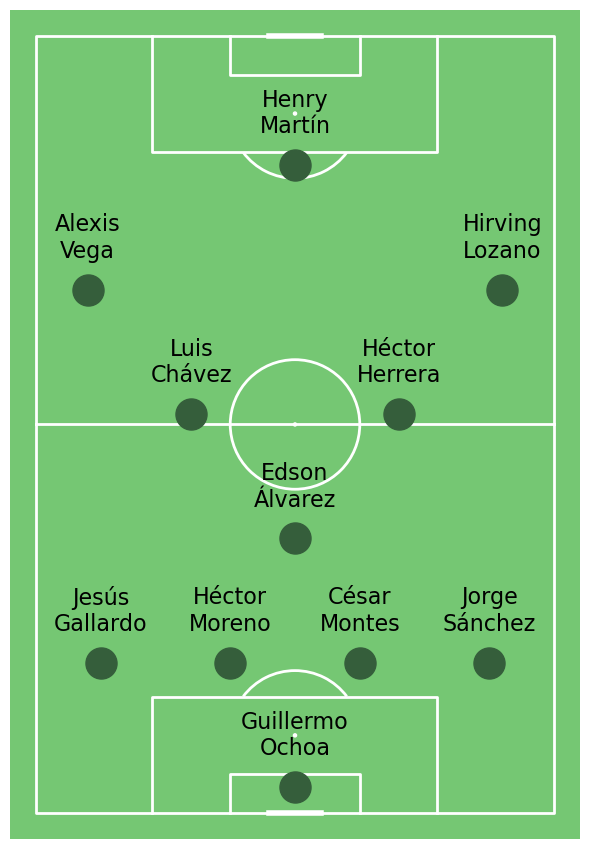

In [3]:
eventFull, related, freeze, tactics = parser.event(3857265)
mexicoXIP = sb.lineups(match_id=3857265)["Mexico"]
mexicoXIP['player_nickname'] = mexicoXIP.apply(lambda x: x["player_name"] if x['player_nickname']== None else x['player_nickname'], axis=1)
# starting players from Argentina
starting_xi_event = eventFull.loc[((eventFull['type_name'] == 'Starting XI') &
                               (eventFull['team_name'] == 'Mexico')), ['id', 'tactics_formation']]
# joining on the team name and formation to the lineup
starting_xi = tactics.merge(starting_xi_event, on='id')
# filter only succesful ball receipts from the starting XI
event = eventFull.loc[((eventFull['type_name'] == 'Ball Receipt') &
                   (eventFull['outcome_name'].isnull()) &
                   (eventFull["minute"]<46) &
                   (eventFull['player_id'].isin(starting_xi['player_id']))
                   ), ['player_id', 'x', 'y']]
starting_xi['player_name'] = starting_xi['player_name'].map(mexicoXIP.set_index('player_name')['player_nickname'])
# merge on the starting positions to the events
event = event.merge(starting_xi, on='player_id')
formation = event['tactics_formation'].iloc[0]

pitch = VerticalPitch(pitch_color='#75c773', line_color='white')
fig, ax = pitch.draw(figsize=(6, 8.72))
ax_text = pitch.formation(formation, positions=starting_xi.position_id, kind='text', c = "black",
                          text=starting_xi.player_name.str.replace(' ', '\n'),
                          va='center', ha='center', fontsize=16, ax=ax)

# scatter markers
mpl.rcParams['hatch.linewidth'] = 3
ax_scatter = pitch.formation(formation, positions=starting_xi.position_id, kind='scatter',
                             c='#355E3B', s=500,
                             # you can also provide a single offset instead of a list
                             # for xoffset and yoffset
                             xoffset=-8,
                             ax=ax)

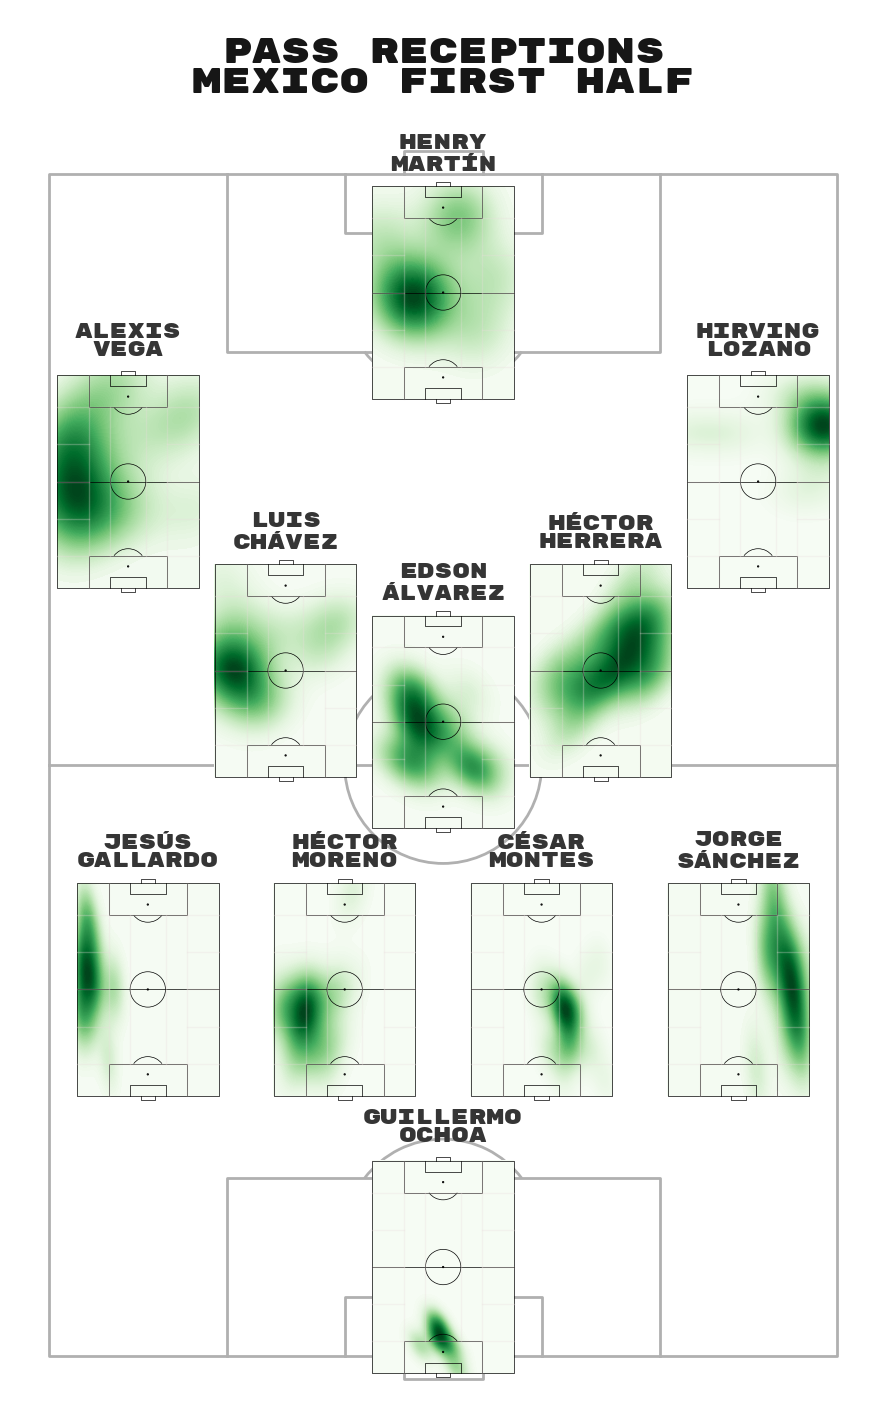

In [4]:
pitch = VerticalPitch(goal_type='box')
fig, axs = pitch.grid(endnote_height=0, title_height=0.08, figheight=14, grid_width=0.9,
                      grid_height=0.9, axis=False)
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')
title = axs['title'].text(0.5, 0.5, 'Pass receptions\nMexico First Half', fontsize=25,
                          va='center',
                          ha='center', color='#161616', fontproperties=fm_rubik.prop)

pitch_ax = pitch.formation(formation,
                           kind='pitch',
                           # avoid overlapping pitches with offsets
                           xoffset=[-3, 6, 6, 6, 6, 14, 0, 0, 0, 0, 0],
                           # pitch is 23 units long (could also set the height).
                           # note this is set assuming the pitch is horizontal, but in this example
                           # it is vertical so that you get the same results
                           # from both VerticalPitch and Pitch
                           width=23,
                           positions=starting_xi['position_id'],
                           ax=axs['pitch'],
                           # additional arguments temporarily amend the pitch appearance
                           # note we are plotting a really faint positional grid
                           # that overlays the kdeplot
                           linewidth=0.5,
                           pitch_color='None',
                           line_zorder=3,
                           line_color='black',
                           positional=True,
                           positional_zorder=3,
                           positional_linewidth=1,
                           positional_alpha=0.3,
                           )

# adding kdeplot and player titles
for position in pitch_ax:
    player_name = starting_xi[starting_xi['position_id'] == position].player_name.iloc[0]
    player_name = player_name.replace(' ', '\n').replace('-', '-\n')
    pitch.text(150, 40, player_name, va='top', ha='center', fontsize=15, ax=pitch_ax[position],
               fontproperties=fm_rubik.prop, color='#353535')
    pitch.kdeplot(x=event.loc[event['position_id'] == position, 'x'],
                  y=event.loc[event['position_id'] == position, 'y'],
                  fill=True, levels=100, cut=100, cmap='Greens', thresh=0, ax=pitch_ax[position])

### Mexico's Formation Analysis

Mexico started with a 433 Holding, in which Edson Álvarez worked in that CDM role but had tendencies to open up to the left instead of dropping down as other CDMs do to receive the ball. One important aspect we can see in the first half is the dominance on the left hand side, as Henry and Edson preferred receieving the ball on that side. Another key aspect that we can see and feel throughout the game is the lack of involvement of Herrera throughout the first half. As we can see he tends to received the ball behind the line of Polish midfielders which can be difficult as he is hidden at times. Also, we can see how Chávez tends to start as close to the sideline as possible. This was seen as a problem for Mexico since the midfield was to spread over the field and the link up was problematic at times. As we can see Vega, Gallardo and Chavez all clashed at the sideline since they tend to all be in those zones. As for the right hand side Chucky and Jorge understood their role correcltly as Jorge went inside as Chucky opened up, this generated some chances in the first half. As for Henry his task for the First Half was to drop down and receive the ball close the the half which was difficult since the help from the other players was not normally there. As for the CBs, watching the game we could see that they loved to try long passes across the field to the wingers, which in theory was a good effort, but actually they did not create that many opportunities.

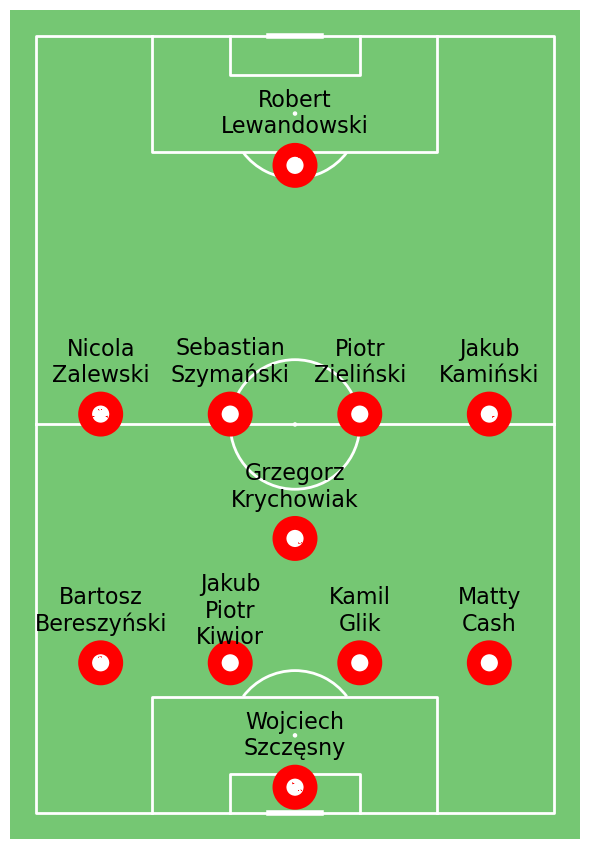

In [5]:
eventFull, related, freeze, tactics = parser.event(3857265)
polandXIP = sb.lineups(match_id=3857265)["Poland"]
polandXIP['player_nickname'] = polandXIP.apply(lambda x: x["player_name"] if x['player_nickname']== None else x['player_nickname'], axis=1)
# starting players from Argentina
starting_xi_event = eventFull.loc[((eventFull['type_name'] == 'Starting XI') &
                               (eventFull['team_name'] == 'Poland')), ['id', 'tactics_formation']]
# joining on the team name and formation to the lineup
starting_xi = tactics.merge(starting_xi_event, on='id')
# filter only succesful ball receipts from the starting XI
event = eventFull.loc[((eventFull['type_name'] == 'Ball Receipt') &
                   (eventFull['outcome_name'].isnull()) &
                   (eventFull["minute"]<46) &
                   (eventFull['player_id'].isin(starting_xi['player_id']))
                   ), ['player_id', 'x', 'y']]
starting_xi['player_name'] = starting_xi['player_name'].map(polandXIP.set_index('player_name')['player_nickname'])
# merge on the starting positions to the events
event = event.merge(starting_xi, on='player_id')
formation = event['tactics_formation'].iloc[0]

pitch = VerticalPitch(pitch_color='#75c773', line_color='white')
fig, ax = pitch.draw(figsize=(6, 8.72))
ax_text = pitch.formation(formation, positions=starting_xi.position_id, kind='text', c = "black",
                          text=starting_xi.player_name.str.replace(' ', '\n'),
                          va='center', ha='center', fontsize=16, ax=ax)


mpl.rcParams['hatch.linewidth'] =20
mpl.rcParams['hatch.color'] = 'white'
ax_scatter = pitch.formation(formation, positions=starting_xi.position_id, kind='scatter',
                             c='red', hatch='o', linewidth=10, s=500,
                             # you can also provide a single offset instead of a list
                             # for xoffset and yoffset
                             xoffset=-8,
                             ax=ax)

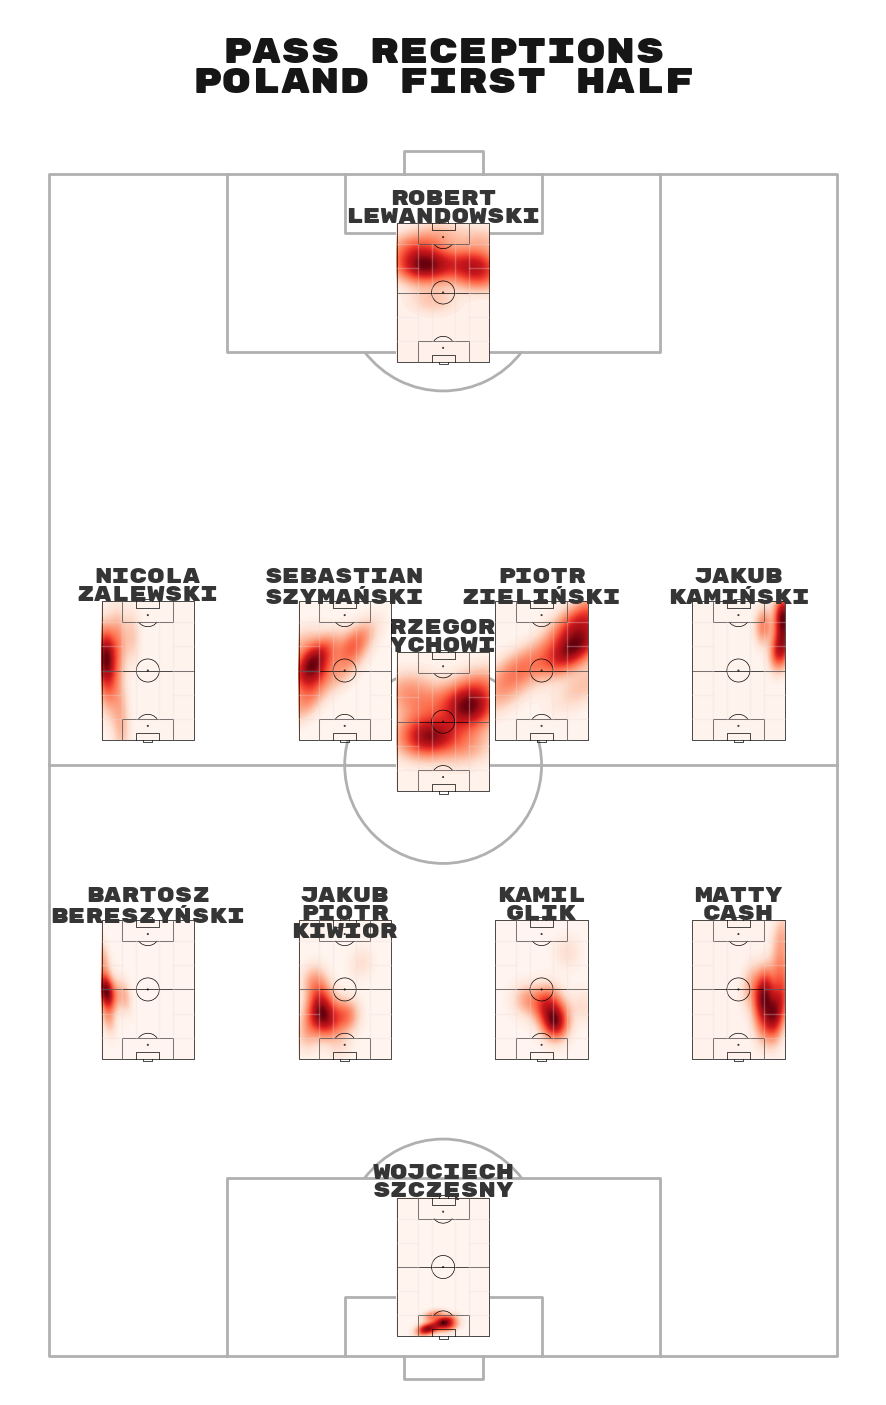

In [6]:
pitch = VerticalPitch(goal_type='box')
fig, axs = pitch.grid(endnote_height=0, title_height=0.08, figheight=14, grid_width=0.9,
                      grid_height=0.9, axis=False)
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')
title = axs['title'].text(0.5, 0.5, 'Pass receptions\nPoland First Half', fontsize=25,
                          va='center',
                          ha='center', color='#161616', fontproperties=fm_rubik.prop)

pitch_ax = pitch.formation(formation,
                           kind='pitch',
                           # avoid overlapping pitches with offsets
                           xoffset=[-3, 6, 6, 6, 6, 14, 0, 0, 0, 0, 0],
                           # pitch is 23 units long (could also set the height).
                           # note this is set assuming the pitch is horizontal, but in this example
                           # it is vertical so that you get the same results
                           # from both VerticalPitch and Pitch
                           width=15,
                           positions=starting_xi['position_id'],
                           ax=axs['pitch'],
                           # additional arguments temporarily amend the pitch appearance
                           # note we are plotting a really faint positional grid
                           # that overlays the kdeplot
                           linewidth=0.5,
                           pitch_color='None',
                           line_zorder=3,
                           line_color='black',
                           positional=True,
                           positional_zorder=3,
                           positional_linewidth=1,
                           positional_alpha=0.3,
                           )

# adding kdeplot and player titles
for position in pitch_ax:
    player_name = starting_xi[starting_xi['position_id'] == position].player_name.iloc[0]
    player_name = player_name.replace(' ', '\n').replace('-', '-\n')
    pitch.text(150, 40, player_name, va='top', ha='center', fontsize=15, ax=pitch_ax[position],
               fontproperties=fm_rubik.prop, color='#353535')
    pitch.kdeplot(x=event.loc[event['position_id'] == position, 'x'],
                  y=event.loc[event['position_id'] == position, 'y'],
                  fill=True, levels=100, cut=100, cmap='Reds', thresh=0, ax=pitch_ax[position])

### Poland's Formation Analysis

As seen in the formation, the starting formation was a 4141, with Krychowiak holding down the CDM spot, but in reality it was more a 4321 with both Szymanski and Zielinski acting as Attacking Midfielders. They tend to go forward and push more while defending to try to close down gaps and make Mexico distribute the ball backwards. As seen, the instructions for Kaminski and Zalewski were to stay wide, while Kaminski as soon as the ball was won, he went straight forward. This created multiple chances as Gallardo, Mexico's LB, also tends to go forward so they were trying to take advantage of this. As for the rest of the team it was a compact side that tried to interrupt any build up with the forwards but were happy to leave the ball to the opposition's defenders. As seen in the map the participation receiving the ball for certain positions was really low meaning that Mexico did a good job winning back possesion. This could also be seen in the game as Mexico generally defended well. As for Lewandowski, he also tended to drop down but tried receiving the ball at the defensive line for Mexico, with Szymanski helping in the inside and Zielinski opening up to receive while Kaminski pushed forward through the side line. The main goal for Poland during the first half was to counterattack and Mexico defended it well during the first half. Defensively they were though to beat down, Mexico had a few chances, but the structure for Poland generally worked.

### First Half Pass Distribution

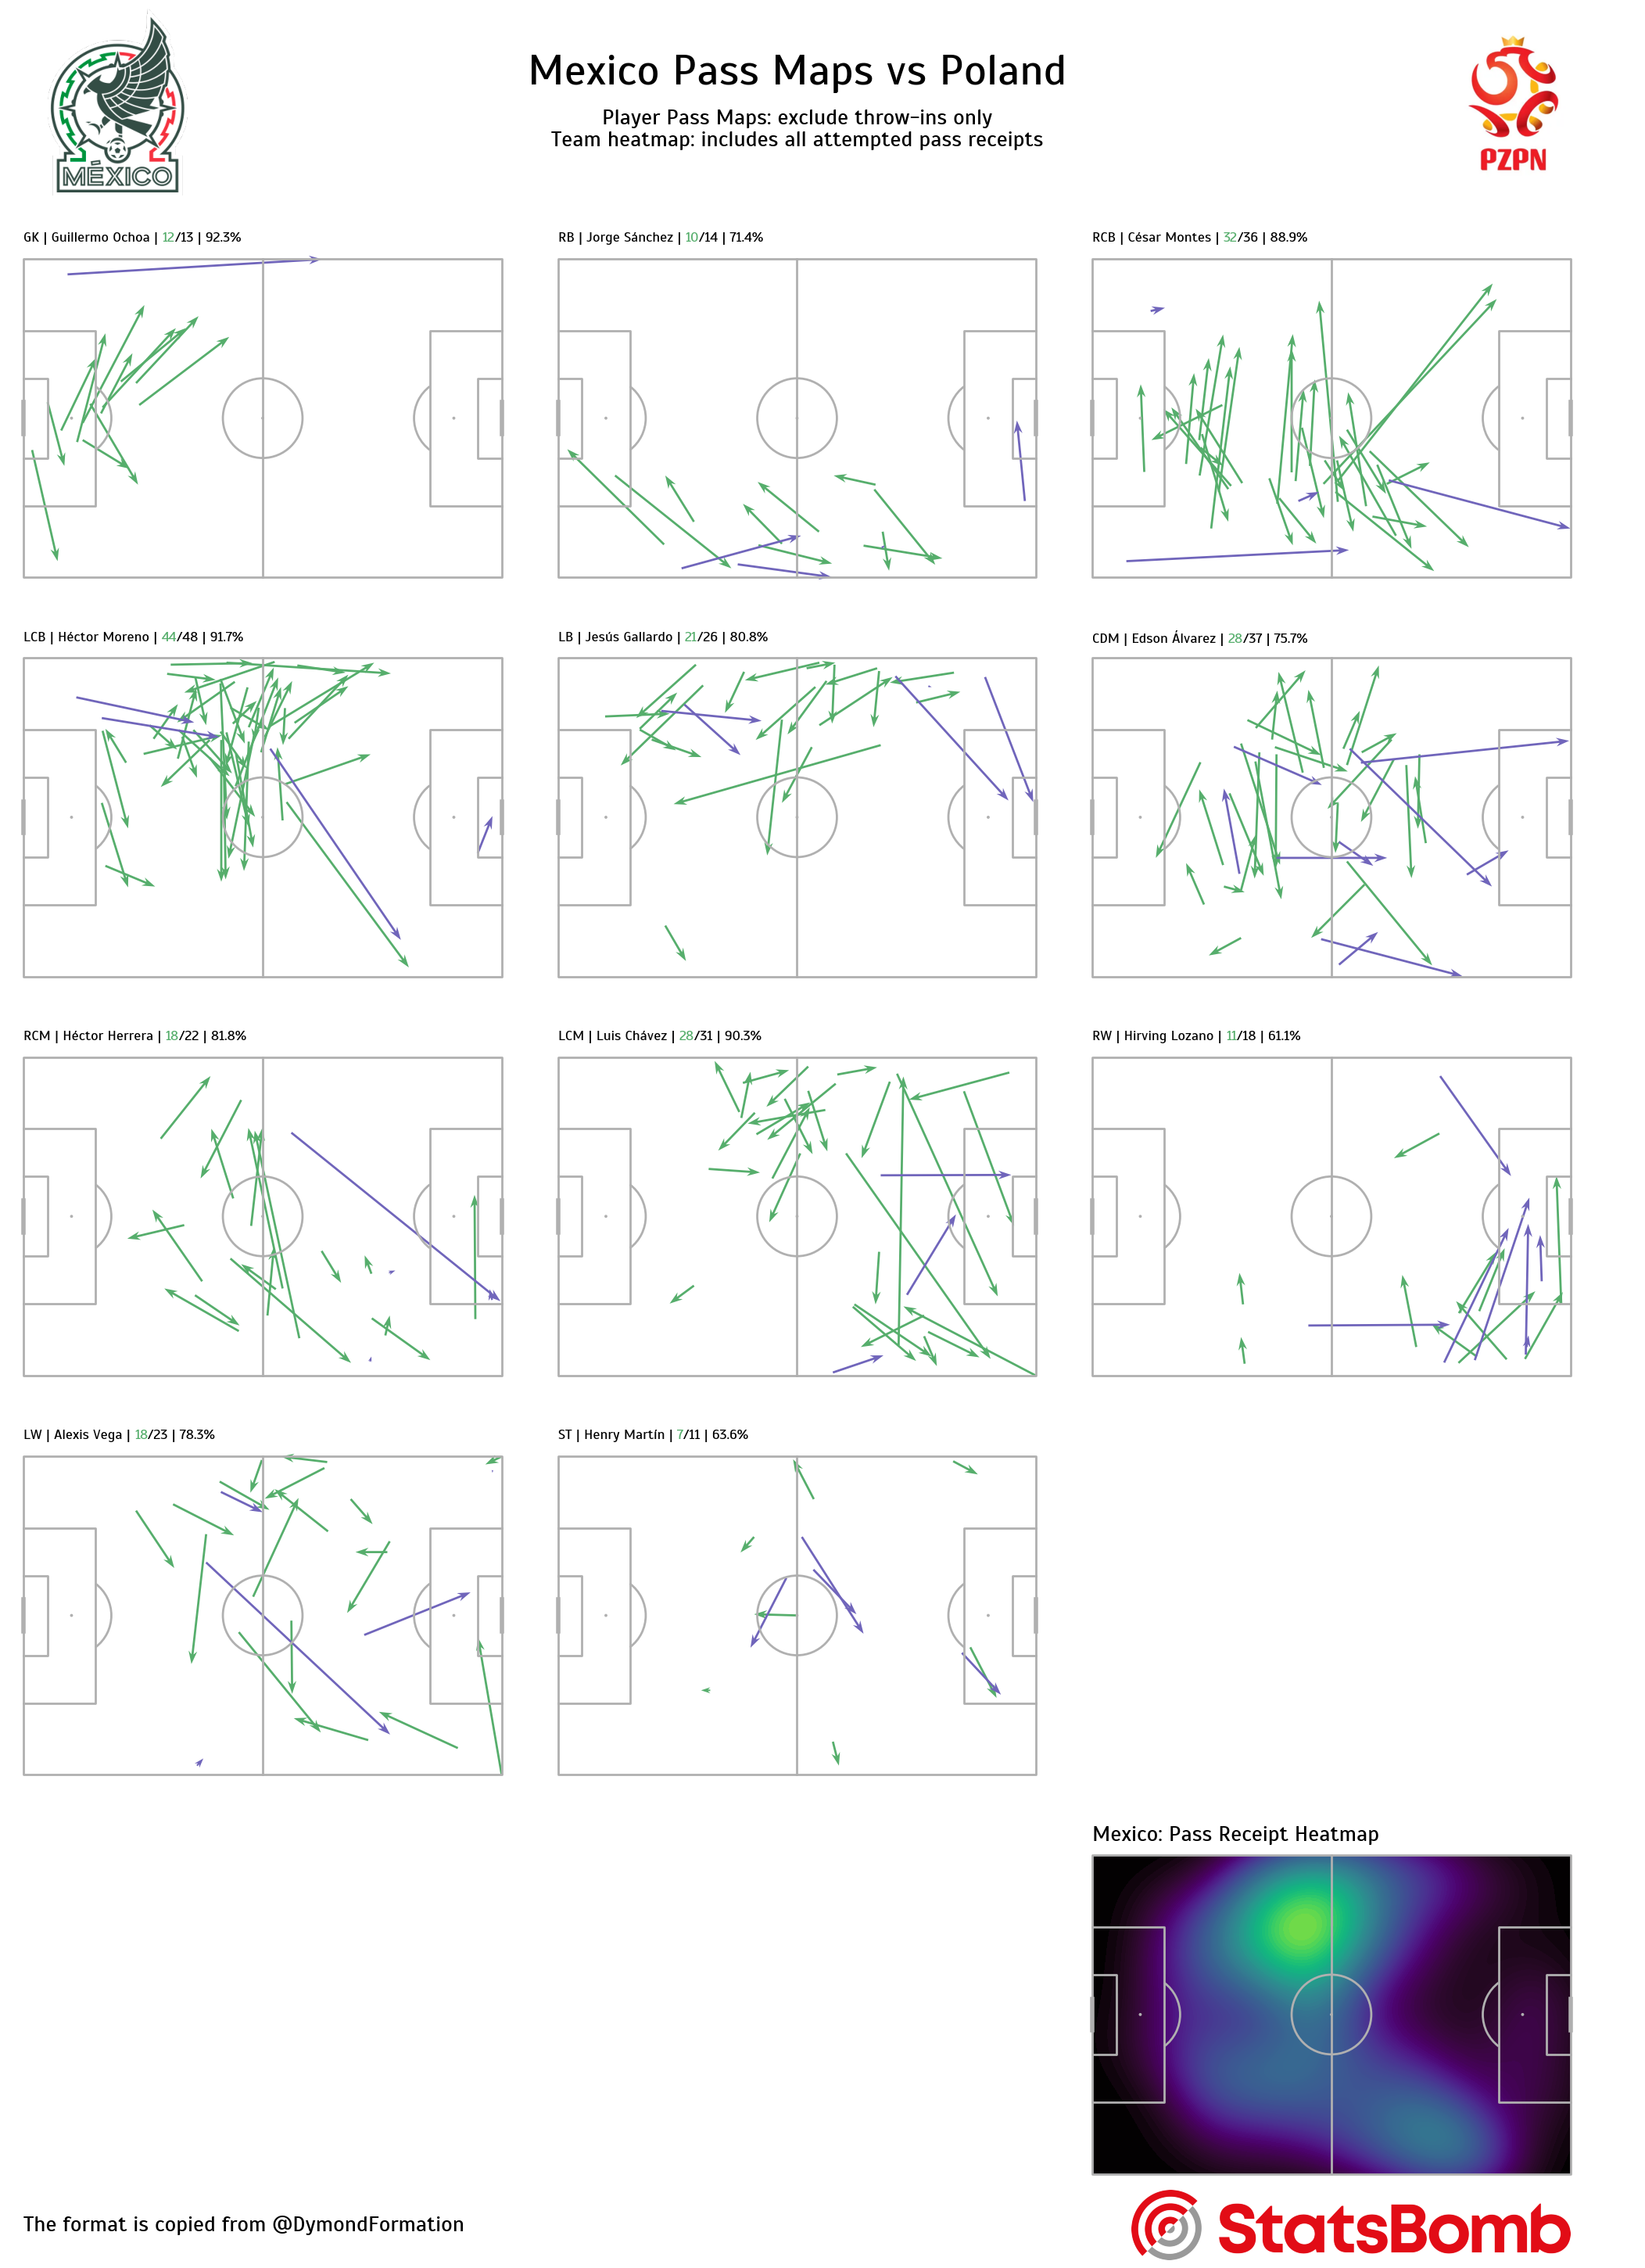

In [8]:
from highlight_text import ax_text

events, related, freeze, tactics = parser.event(3857265)
lineup = parser.lineup(3857265)

events = events.loc[(events["minute"]<46)]

##############################################################################
# Add on the subbed on/ off times to the lineup dataframe

# dataframe with player_id and when they were subbed off
time_off = events.loc[(events.type_name == 'Substitution'),
                      ['player_id', 'minute']]
time_off.rename({'minute': 'off'}, axis='columns', inplace=True)
# dataframe with player_id and when they were subbed on
time_on = events.loc[(events.type_name == 'Substitution'),
                     ['substitution_replacement_id', 'minute']]
time_on.rename({'substitution_replacement_id': 'player_id',
                'minute': 'on'}, axis='columns', inplace=True)
players_on = time_on.player_id
# merge on times subbed on/off
lineup = lineup.merge(time_on, on='player_id', how='left')
lineup = lineup.merge(time_off, on='player_id', how='left')

##############################################################################
# Filter the lineup to include players who played and add on the first position they played

# filter the tactics lineup for the starting xi
starting_ids = events[events.type_name == 'Starting XI'].id
starting_xi = tactics[tactics.id.isin(starting_ids)]
starting_players = starting_xi.player_id

# filter the lineup for players that actually played
mask_played = ((lineup.on.notnull()) | (lineup.off.notnull()) |
               (lineup.player_id.isin(starting_players)))
lineup = lineup[mask_played].copy()

# get the first position for each player and add this to the lineup dataframe
player_positions = (events[['player_id', 'position_id']]
                    .dropna(how='any', axis='rows')
                    .drop_duplicates('player_id', keep='first'))
lineup = lineup.merge(player_positions, how='left', on='player_id')

# add on the position abbreviation
formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}
lineup['position_abbreviation'] = lineup.position_id.map(formation_dict)

# sort the dataframe so the players are
# in the order of their position (if started), otherwise in the order they came on
lineup['start'] = lineup.player_id.isin(starting_players)
lineup.sort_values(['team_name', 'start', 'on', 'position_id'],
                   ascending=[True, False, True, True], inplace=True)

##############################################################################
# Filter the lineup/ events to one team and exclude some set pieces

# filter the lineup for Barcelona players
# if you want the other team set team = team2
team1, team2 = lineup.team_name.unique()  # Mexico (team1), Poland (team2)
team = team1
lineup_team = lineup[lineup.team_name == team].copy()

# filter the events to exclude some set pieces
set_pieces = ['Throw-in', 'Free Kick', 'Corner', 'Kick Off', 'Goal Kick']
# for the team pass map
pass_receipts = events[(events.team_name == team) & (events.type_name == 'Ball Receipt')].copy()
# for the player pass maps
passes_excl_throw = events[(events.team_name == team) & (events.type_name == 'Pass') &
                           (events.sub_type_name != 'Throw-in')].copy()

# identify how many players played and how many subs were used
# we will use this in the loop for only plotting pass maps for as
# many players who played
num_players = len(lineup_team)
num_sub = num_players - 11

##############################################################################
# Setup the pitch, arrows, and get some images

# add padding to the top so we can plot the titles, and raise the pitch lines
pitch = Pitch(pad_top=10, line_zorder=2)

# arrow properties for the sub on/off
green_arrow = dict(arrowstyle='simple, head_width=0.7',
                   connectionstyle="arc3,rad=-0.8", fc="green", ec="green")
red_arrow = dict(arrowstyle='simple, head_width=0.7',
                 connectionstyle="arc3,rad=-0.8", fc="red", ec="red")

# a fontmanager object for using a google font
fm_scada = FontManager('https://raw.githubusercontent.com/googlefonts/scada/main/fonts/ttf/'
                       'Scada-Regular.ttf')

# Load the Club/ Statsbomb logos
# these are the property of the respective clubs/ StatsBomb.
MEXICO_LOGO_URL = ('https://miseleccion.mx/assets/img/snm_nuevo.png?rnd=534375')
POLAND_LOGO_URL = ('https://brandemia.org/contenido/subidas/2014/03/futbol1.jpg')
SB_LOGO_URL = ('https://raw.githubusercontent.com/statsbomb/open-data/'
               'master/img/SB%20-%20Icon%20Lockup%20-%20Colour%20positive.png')
barca_logo = Image.open(urlopen(MEXICO_LOGO_URL))
deportivo_logo = Image.open(urlopen(POLAND_LOGO_URL))
sb_logo = Image.open(urlopen(SB_LOGO_URL))

##############################################################################
# Plotting the Pass Maps

# filtering out some highlight_text warnings - the warnings aren't correct as the
# text fits inside the axes.
warnings.simplefilter("ignore", UserWarning)

# plot the 5 * 3 grid
fig, axs = pitch.grid(nrows=5, ncols=3, figheight=30,
                      endnote_height=0.03, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_height=0.08, grid_height=0.84)
# cycle through the grid axes and plot the player pass maps
for idx, ax in enumerate(axs['pitch'].flat):
    # only plot the pass maps up to the total number of players
    if idx < num_players:
        # filter the complete/incomplete passes for each player (excudes throw-ins)
        lineup_player = lineup_team.iloc[idx]
        player_id = lineup_player.player_id
        player_pass = passes_excl_throw[passes_excl_throw.player_id == player_id]
        complete_pass = player_pass[player_pass.outcome_name.isnull()]
        incomplete_pass = player_pass[player_pass.outcome_name.notnull()]

        # plot the arrows
        pitch.arrows(complete_pass.x, complete_pass.y,
                     complete_pass.end_x, complete_pass.end_y,
                     color='#56ae6c', width=2, headwidth=4, headlength=6, ax=ax)
        pitch.arrows(incomplete_pass.x, incomplete_pass.y,
                     incomplete_pass.end_x, incomplete_pass.end_y,
                     color='#7065bb', width=2, headwidth=4, headlength=6, ax=ax)

        # plot the title for each player axis
        # here we use f-strings to combine the variables from the dataframe and text
        # we plot the title at x=0, y=-5
        # this is the left hand-side of the pitch (x=0) and between
        # top of the y-axis (y=0) and the top of the padding (y=-10, remember pad_top = 10)
        # note that the StatsBomb y-axis is inverted, so you may need
        # to change this if you use another pitch_type (e.g. 'uefa').
        # We also use the highlight-text package to highlight complete_pass green
        # so put <> around the number of completed passes.
        total_pass = len(complete_pass) + len(incomplete_pass)
        annotation_string = (f'{lineup_player.position_abbreviation} | '
                             f'{lineup_player.player_nickname} | '
                             f'<{len(complete_pass)}>/{total_pass} | '
                             f'{round(100 * len(complete_pass)/total_pass, 1)}%')
        ax_text(0, -5, annotation_string, ha='left', va='center', fontsize=13,
                fontproperties=fm_scada.prop,  # using the fontmanager for the google font
                highlight_textprops=[{"color": '#56ae6c'}], ax=ax)

        # add information for subsitutions on/off and arrows
        if not np.isnan(lineup_team.iloc[idx].off):
            ax.text(116, -10, str(lineup_team.iloc[idx].off.astype(int)), fontsize=20,
                    fontproperties=fm_scada.prop,
                    ha='center', va='center')
            ax.annotate('', (120, -2), (112, -2), arrowprops=red_arrow)
        if not np.isnan(lineup_team.iloc[idx].on):
            ax.text(104, -10, str(lineup_team.iloc[idx].on.astype(int)), fontsize=20,
                    fontproperties=fm_scada.prop,
                    ha='center', va='center')
            ax.annotate('', (108, -2), (100, -2), arrowprops=green_arrow)

# plot on the last Pass Map
# (note ax=ax as we have cycled through to the last axes in the loop)
pitch.kdeplot(x=pass_receipts.x, y=pass_receipts.y, ax=ax,
              cmap=cmr.lavender,
              levels=100,
              thresh=0, fill=True)
ax.text(0, -5, f'{team}: Pass Receipt Heatmap', ha='left', va='center',
        fontsize=20, fontproperties=fm_scada.prop)

# remove unused axes (if any)
for ax in axs['pitch'].flat[11 + num_sub:-1]:
    ax.remove()

# endnote text
axs['endnote'].text(0, 0.5, 'The format is copied from @DymondFormation',
                    fontsize=20, fontproperties=fm_scada.prop, va='center', ha='left')
# to get the left position to align with the pitches I plotted it once with a random
# left position (e.g. 0.5) and then used the following code
# bbox_sb = ax_sb_logo.get_position()
# bbox_endnote = axs['endnote'].get_position()
# left = bbox_endnote.x1 - bbox_sb.width
ax_sb_logo = add_image(sb_logo, fig, left=0.701126,
                       # set the bottom and height to align with the endnote
                       bottom=axs['endnote'].get_position().y0,
                       height=axs['endnote'].get_position().height)

# title text
axs['title'].text(0.5, 0.65, f'{team1} Pass Maps vs {team2}', fontsize=40,
                  fontproperties=fm_scada.prop, va='center', ha='center')
SUB_TEXT = ('Player Pass Maps: exclude throw-ins only\n'
            'Team heatmap: includes all attempted pass receipts')
axs['title'].text(0.5, 0.35, SUB_TEXT, fontsize=20,
                  fontproperties=fm_scada.prop, va='center', ha='center')
# plot logos (same height as the title_ax)
# set the barca logo to align with the left/bottom of the title axes
ax_barca_logo = add_image(barca_logo, fig,
                          left=axs['title'].get_position().x0,
                          bottom=axs['title'].get_position().y0,
                          height=axs['title'].get_position().height)
# set the deportivo logo to align with the right/bottom of the title axes
# to get the left position to align with the pitches I plotted it once with a random
# left position (e.g. 0.5) and then used the following code
# bbox_logo = ax_deportivo_logo.get_position()
# bbox_title = axs['title'].get_position()
# left = bbox_title.x1 - bbox_logo.width
ax_deportivo_logo = add_image(deportivo_logo, fig, left=0.8521,
                              bottom=axs['title'].get_position().y0,
                              height=axs['title'].get_position().height)
# setting this example to the gallery thumbnail
# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_grid_005'

plt.show()  # If you are using a Jupyter notebook you do not need this line
